# Part 3: vector data in Python

In [ ]:
# If on Colab: uncomment and execute the following line
# ! pip install geopandas

### Read files containing vector data

In [1]:
# A .shp file with some crop fields near Amsterdam, the Netherlands
path_fields = '../data/fields.shp'

# Zip file containing a .gpkg file
path_wells = '../data/wells.gpkg.zip'

In [2]:
# Load the two files useing the "read_file" function
import geopandas as gpd

In [3]:
fields = gpd.read_file(path_fields)

In [4]:
wells = gpd.read_file(path_wells)

In [5]:
# Inspect the two GeoDataFrames
fields

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120154.932 495930.341, 120154.309 49..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120101.483 496378.781, 120100.177 49..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119858.185 496057.345, 119855.745 49..."
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120168.354 496651.174, 120160.995 49..."
4,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((119944.018 496061.229, 119924.704 49..."
...,...,...,...,...,...,...
4867,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133371.140 492631.152, 133363.203 49..."
4868,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133422.246 492887.057, 133420.130 49..."
4869,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133554.659 492738.186, 133554.924 49..."
4870,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133434.981 492748.790, 133430.854 49..."


In [6]:
wells

,bro_id,delivery_accountable_party,quality_regime,with_prehistory,delivery_context,construction_standard,initial_function,removed,number_of_monitoring_tubes,groundlevel_stable,...,corrected,latest_correction_time,under_review,under_review_time,deregistered,deregistration_time,reregistered,reregistration_time,coordinate_transformation,geometry
0,GMW000000003781,27370927,IMBRO,nee,publiekeTaak,geen,stand,nee,1.0,nee,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,POINT (4.31424 52.07304)
1,GMW000000003922,52605825,IMBRO,nee,publiekeTaak,geen,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,POINT (4.18840 51.80594)
2,GMW000000003925,52605825,IMBRO,nee,publiekeTaak,geen,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,POINT (4.12238 51.82734)
3,GMW000000003928,52605825,IMBRO,nee,publiekeTaak,geen,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,POINT (4.12246 51.82755)
4,GMW000000003932,52605825,IMBRO,nee,publiekeTaak,geen,stand,nee,2.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,POINT (4.14502 51.82246)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29859,GMW000000061108,62252046,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2018,POINT (4.26380 51.86125)
29860,GMW000000061109,62252046,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2018,POINT (4.24207 51.84957)
29861,GMW000000061110,62252046,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2018,POINT (4.24935 51.82764)
29862,GMW000000061111,62252046,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2018,POINT (4.24616 51.86560)


### Visualize polygons and points 

<Axes: >

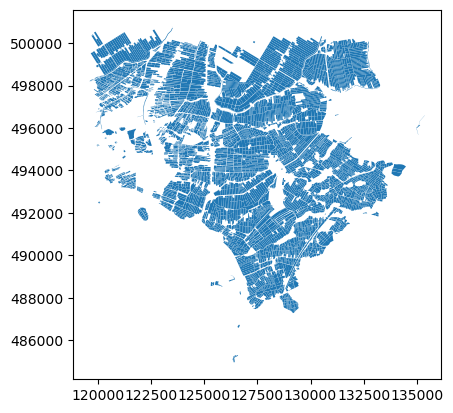

In [7]:
# Visualize fields using the "plot" function
fields.plot()

<Axes: >

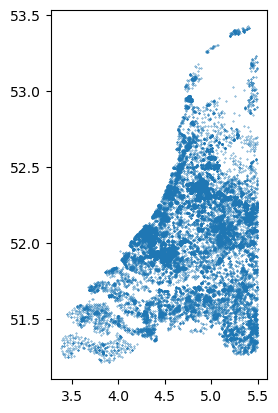

In [9]:
# Visualize wells
wells.plot(markersize=0.1)

### Crop vector data by bounding box

In [10]:
# Align the CRS by "to_crs" function
wells = wells.to_crs(fields.crs)

<Axes: >

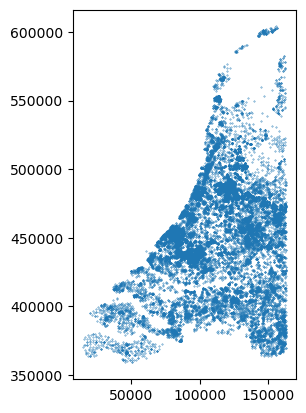

In [11]:
wells.plot(markersize=0.1)

In [13]:
# Get the bounding box of the fields using the "total_bounds" attributes
xmin, ymin, xmax,ymax = fields.total_bounds

In [14]:
# Select the wells withing the bounding box using the "cx" indexer 
wells_cx = wells.cx[xmin:xmax, ymin:ymax]

<Axes: >

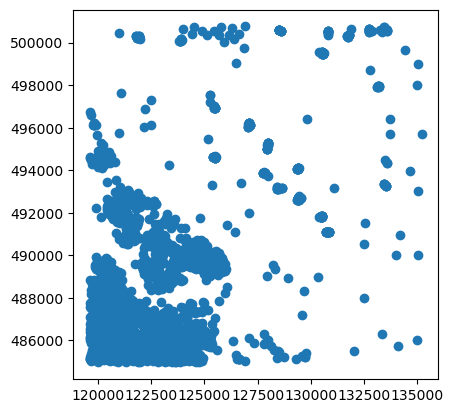

In [15]:
wells_cx.plot()

<Axes: >

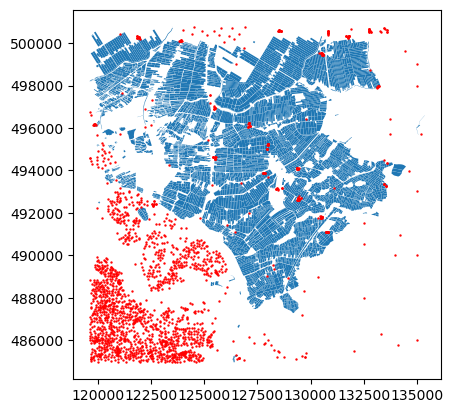

In [16]:
# Visualize the cropped wells against polygons
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
fields.plot(ax=ax)
wells_cx.plot(ax=ax, color='r', markersize=0.5)

### Spatial query using `clip`

In [17]:
# Grow a 500m buffer around wells using the "buffer" function
wells_cx_buffer = wells_cx.buffer(500)

In [19]:
wells_cx_buffer

615      POLYGON ((123227.241 492431.721, 123224.833 49...
685      POLYGON ((123132.482 492566.291, 123130.074 49...
717      POLYGON ((123098.161 492366.122, 123095.754 49...
740      POLYGON ((123050.471 492400.241, 123048.063 49...
817      POLYGON ((123070.811 492333.891, 123068.403 49...
                               ...                        
29214    POLYGON ((124035.000 490080.000, 124032.592 49...
29298    POLYGON ((121504.000 487189.000, 121501.592 48...
29299    POLYGON ((122888.900 485440.200, 122886.492 48...
29304    POLYGON ((130247.600 485211.100, 130245.192 48...
29305    POLYGON ((130077.100 485243.700, 130074.692 48...
Length: 1984, dtype: geometry

In [20]:
# Select within the 500m buffer of wells using "clip"
fields_buffer_clip = fields.clip(wells_cx_buffer)

<Axes: >

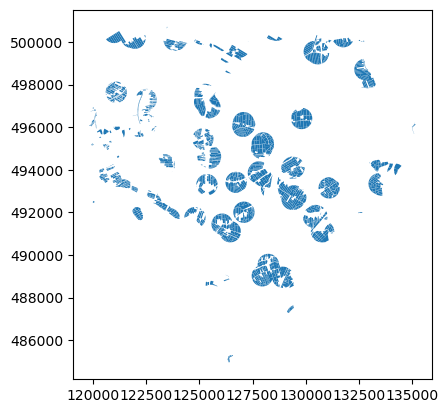

In [21]:
# Visualize the fields within the buffer
fields_buffer_clip.plot()

### Spatial query using `sjoin`

In [22]:
# Convert wells buffer into a GeoDataFrame
df_wells_cx_buffer = gpd.GeoDataFrame(geometry = wells_cx_buffer)

In [24]:
df_wells_cx_buffer

,geometry
615,"POLYGON ((123227.241 492431.721, 123224.833 49..."
685,"POLYGON ((123132.482 492566.291, 123130.074 49..."
717,"POLYGON ((123098.161 492366.122, 123095.754 49..."
740,"POLYGON ((123050.471 492400.241, 123048.063 49..."
817,"POLYGON ((123070.811 492333.891, 123068.403 49..."
...,...
29214,"POLYGON ((124035.000 490080.000, 124032.592 49..."
29298,"POLYGON ((121504.000 487189.000, 121501.592 48..."
29299,"POLYGON ((122888.900 485440.200, 122886.492 48..."
29304,"POLYGON ((130247.600 485211.100, 130245.192 48..."


In [25]:
# Spatially join "fields" and "df_wells_cx_buffer"
fields_wells_cx_buffer = fields.sjoin(df_wells_cx_buffer)

In [26]:
fields_wells_cx_buffer

,category,gewas,gewascode,jaar,status,geometry,index_right
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120154.932 495930.341, 120154.309 49...",20800
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119858.185 496057.345, 119855.745 49...",20800
4,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((119944.018 496061.229, 119924.704 49...",20800
5,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120180.970 495948.210, 120177.562 49...",20800
14,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119956.123 495139.738, 119945.408 49...",20800
...,...,...,...,...,...,...,...
4801,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133515.954 494353.159, 133513.958 49...",26767
4802,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133697.942 494188.597, 133694.157 49...",26767
4777,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((134037.581 494286.449, 134051.869 49...",5448
4798,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((134304.867 493916.895, 134298.151 49...",5448


In [27]:
# Get the unique indexes of the joined results
index= fields_wells_cx_buffer.index.unique()

In [28]:
index

Int64Index([   0,    2,    4,    5,   14,   16,   17,   18,   41,    1,
            ...
            4789, 4790, 4791, 4797, 4798, 4801, 4802, 4803, 4781, 4799],
           dtype='int64', length=1721)

In [29]:
# Use iloc to select the fields in the buffer with the indexes
fields_in_buffer = fields.iloc[index]

<Axes: >

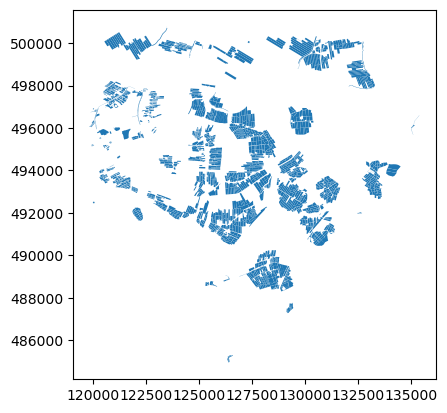

In [30]:
# Visualize the results
fields_in_buffer.plot()